In [4]:
import numpy as np
# import matplotlib.plotly as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd
#imputer to handle missing data 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
#o check accuracy
from sklearn.metrics import accuracy_score
# to check accuracy
from sklearn.metrics import *
import pickle 
#visualization in 3D
from mpl_toolkits.mplot3d import Axes3D
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import csv

In [6]:
# load dataset
test_dataset = pd.read_csv ("CSV_files/test_file.csv")
print("Dataset has {} rows and {} Columns".format(test_dataset.shape[0],test_dataset.shape[1])) 

Dataset has 5214 rows and 2 Columns


(5214, 1) (5214,)


 y_prediction: [211.34679992 165.97414657 165.97414657 ... 286.96788883 218.90890881
 196.22258213]

Accuracy train by acc_r2 82.96947666763158

Accuracy train by mean_sq_log 95.40163564854858


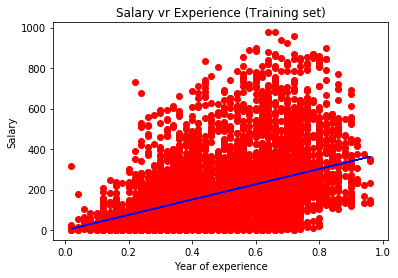

In [13]:
class Testing():
           
    def y_prediction(self,regression, x_train):
        # predicting the test set result
        return regression.predict(x_train)
    
    def accuracy(self,y_predict_train,y_train):
        # acc using r2
        error = r2_score(y_train, y_predict_train)      
        acc_r2 = (1-error)*100
        
        # using median_ab_error
        median_ab_error = median_absolute_error(y_train, y_predict_train)
        return acc_r2, median_ab_error
    
    def visualization(self,x_train,y_train, reg1):
        # Visualization the training set result
        plt.scatter(x_train,y_train, color = 'red')
        plt.plot(x_train,reg1.predict(x_train), color = 'blue')
        plt.title("Salary vr Experience (Training set)")
        plt.xlabel("Year of experience")
        plt.ylabel("Salary")
        plt.show()
        

def main():
    #class obj created
    obj  = Testing()
    
    # seperate fetures and label
    x_test = test_dataset.iloc[:,:-1].values
    y_test = test_dataset.iloc[:,1].values
 
    print(x_test.shape,y_test.shape)
    #cross validation
    file1 = open('SimpleLRModulefile.pkl', 'rb')
    reg1 = pickle.load(file1)
    
    # y_prediction ( cross validation)   
    y_test_pre = obj.y_prediction(reg1, x_test)
    print("\n\n y_prediction:",y_test_pre)
    
    acc_r2, median_ab_error = obj.accuracy(y_test_pre,y_test)
    print("\nAccuracy train by acc_r2", acc_r2)
    print("\nAccuracy train by mean_sq_log", median_ab_error)

    obj.visualization(x_test,y_test,reg1)

if __name__ == '__main__':
    main()
